<a href="https://colab.research.google.com/github/gabilodeau/INF8770/blob/master/Transformee%20KL%20sur%20image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de l'application de la transformée KL sur une image

Exécuter les 2 lignes suivantes pour colab.

In [1]:
!git clone https://github.com/gabilodeau/INF8770
%cd INF8770

Cloning into 'INF8770'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 463 (delta 72), reused 27 (delta 8), pack-reused 295
Receiving objects: 100% (463/463), 42.31 MiB | 27.74 MiB/s, done.
Resolving deltas: 100% (226/226), done.
/content/INF8770


In [2]:
import numpy as np
import matplotlib.pyplot as py
from numpy import linalg as LA

Lecture d'une image. Image transformée en double précision pour les calculs 

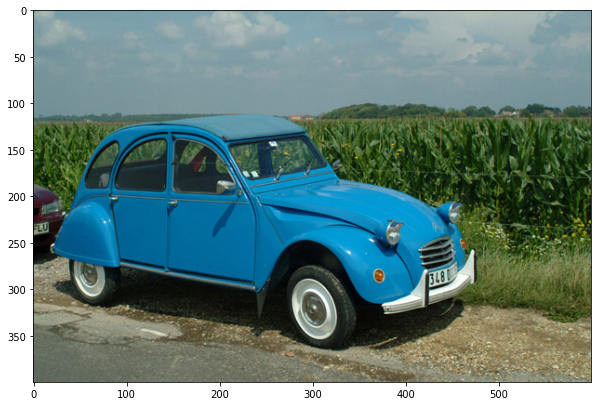

In [3]:
fig1 = py.figure(figsize = (10,10))
imagelue = py.imread('RGB.jpg')
image=imagelue.astype('double')
py.imshow(imagelue)
py.show()

Calcul des valeurs moyennes des RGB. Nécessaire pour calculer la matrice de covariance des RGB

In [4]:
sommeR = 0.0
sommeG = 0.0
sommeB = 0.0
for i in range(len(image)):
    for j in range(len(image[0])):
        sommeR=sommeR+image[i][j][0]
        sommeG=sommeG+image[i][j][1]
        sommeB=sommeB+image[i][j][2]
        
nbPixels = len(image)*len(image[0])        
MoyR= sommeR / nbPixels
MoyG= sommeG / nbPixels
MoyB= sommeB / nbPixels

print(MoyR)
print(MoyG)
print(MoyB)

82.29666666666667
113.95685
109.42970416666667


Calcul de la matrice de covariance des RGB

In [5]:
covRGB = np.zeros((3,3), dtype = "double")
for i in range(len(image)):
    for j in range(len(image[0])):
        vecTemp=[[image[i][j][0] - MoyR], [image[i][j][1]] - MoyG, [image[i][j][2] - MoyB]]
        vecProdTemp = np.dot(vecTemp,np.transpose(vecTemp))
        covRGB = np.add(covRGB,vecProdTemp)

covRGB = covRGB / nbPixels        
print(covRGB)

[[3195.78033055 1974.31848033 1379.43985443]
 [1974.31848033 2280.56967141 2598.23237924]
 [1379.43985443 2598.23237924 3909.0112585 ]]


Calcul des vecteurs propres et valeurs propres

In [6]:
eigval, eigvec = LA.eig(covRGB)
print(eigval)
print()
print(eigvec)

[7159.62584336 2127.85199822   97.88341888]

[[-0.50631607 -0.79641966  0.33069588]
 [-0.55593729  0.00830122 -0.83118279]
 [-0.65922513  0.60468737  0.44696243]]


Pour illustrer les bénéfices du changement de repère, une composante sur trois sera supprimée dans le nouveau repère. a=Mb, où b est la composant RGB - la moyenne, M la matrice de transformation de repère, et a est la composante dans l'espace des vecteurs propres. 

In [7]:
eigvec = np.transpose(eigvec)
eigvecsansAxe0 = np.copy(eigvec)
eigvecsansAxe0[0,:] = [0.0,0.0,0.0]
eigvecsansAxe1 = np.copy(eigvec)
eigvecsansAxe1[1,:] = [0.0,0.0,0.0]
eigvecsansAxe2 = np.copy(eigvec)
eigvecsansAxe2[2,:] = [0.0,0.0,0.0]

imageKLsansAxe0 = np.copy(image)
imageKLsansAxe1 = np.copy(image)
imageKLsansAxe2 = np.copy(image)

vecMoy =[[MoyR], [MoyG], [MoyB]] 

for i in range(len(image)):
    for j in range(len(image[0])):
        vecTemp=[[image[i][j][0]], [image[i][j][1]], [image[i][j][2]]]
        #a=Mb
        imageKLsansAxe0[i][j][:] = np.reshape(np.dot(eigvecsansAxe0,np.subtract(vecTemp,vecMoy)),(3))
        imageKLsansAxe1[i][j][:] = np.reshape(np.dot(eigvecsansAxe1,np.subtract(vecTemp,vecMoy)),(3))
        imageKLsansAxe2[i][j][:] = np.reshape(np.dot(eigvecsansAxe2,np.subtract(vecTemp,vecMoy)),(3))
                                      


Les images dans les repères définis par les vecteurs propres ne peuvent pas être affichées. Toutefois, en éliminant un axe, on a retiré 33% de l'information. Une composante vaut zéro. Exemple:

In [8]:
print(imageKLsansAxe0[10][10][:])

[  0.         -12.82565839   4.8373991 ]


En faisant la transformée inverse, on peut voir les images qui résultent de la compression. b=inv(M)a. Dans le code, on utilse pinv (Pseudo-inverse), car la matrice est parfois singulière. Il faut faire b + moyenne.

In [9]:
invEigvecsansAxe0 = LA.pinv(eigvecsansAxe0);
invEigvecsansAxe1 = LA.pinv(eigvecsansAxe1);
invEigvecsansAxe2 = LA.pinv(eigvecsansAxe2);

vecMoy =[MoyR, MoyG, MoyB] 
imageRGBsansAxe0 = np.copy(image)
imageRGBsansAxe1 = np.copy(image)
imageRGBsansAxe2 = np.copy(image)

for i in range(len(image)):
    for j in range(len(image[0])):
        #b=inv(M)a
        vecTempsansAxe0=[[imageKLsansAxe0[i][j][0]], [imageKLsansAxe0[i][j][1]], [imageKLsansAxe0[i][j][2]]]
        vecTempsansAxe1=[[imageKLsansAxe1[i][j][0]], [imageKLsansAxe1[i][j][1]], [imageKLsansAxe1[i][j][2]]]
        vecTempsansAxe2=[[imageKLsansAxe2[i][j][0]], [imageKLsansAxe2[i][j][1]], [imageKLsansAxe2[i][j][2]]]     
        imageRGBsansAxe0[i][j][:] = np.add(np.reshape(np.dot(invEigvecsansAxe0,vecTempsansAxe0),(3)),vecMoy)
        imageRGBsansAxe1[i][j][:] = np.add(np.reshape(np.dot(invEigvecsansAxe1,vecTempsansAxe1),(3)),vecMoy)
        imageRGBsansAxe2[i][j][:] = np.add(np.reshape(np.dot(invEigvecsansAxe2,vecTempsansAxe2),(3)),vecMoy)

Résultat sans l'axe de plus grande énergie. L'image est très dégradée.

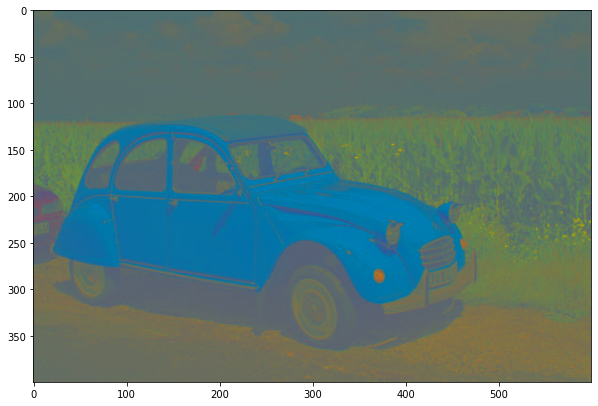

In [10]:
fig2 = py.figure(figsize = (10,10))
imageout = np.clip(imageRGBsansAxe0,0,255)
imageout= imageout.astype('uint8')
py.imshow(imageout)
py.show()

Résultat sans l'axe de moyenne énergie. L'image assez dégradée.

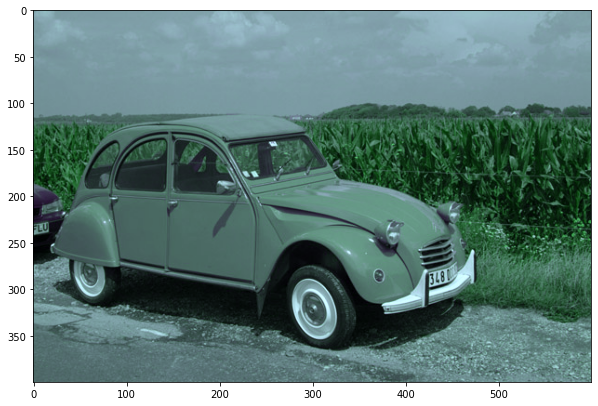

In [11]:
fig2 = py.figure(figsize = (10,10))
imageout = np.clip(imageRGBsansAxe1,0,255)
imageout= imageout.astype('uint8')
py.imshow(imageout)
py.show()

Résultat sans l'axe de faible énergie. L'impact sur l'image est minime.

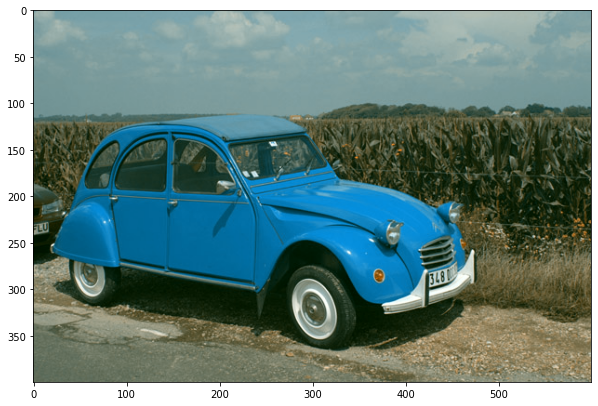

In [12]:
fig2 = py.figure(figsize = (10,10))
imageout = np.clip(imageRGBsansAxe2,0,255)
imageout= imageout.astype('uint8')
py.imshow(imageout)
py.show()